In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd

import plotly.express as px
import plotly.graph_objects as go
import plotly as py
import ipywidgets as widgets
from ipywidgets import Layout

c:\Users\cday\Anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\cday\AppData\Local\Temp\ipykernel_12700\1792437886.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are 

In [2]:
dirWork = os.getcwd()
dirData = os.path.join(dirWork, r'data')

print("Working Directory: " + dirWork)
print("Data Directory: " + dirData)

Working Directory: d:\GitHub\TDM-DEV-v920-E2-Analysis\archive-investigations
Data Directory: d:\GitHub\TDM-DEV-v920-E2-Analysis\archive-investigations\data


## Purpose

**Assessment #1**: Drive access link check for PNR assessment (identify which stations have unrealistic PNR). Create summary of [station, pnr trips, walk trips]

## Inputs

 - `@ParentDir@@ScenarioDir@4_ModeChoice/3_TransitAssign/@RID@_transit_rider_summary_link.csv`
 - `@ParentDir@@ScenarioDir@4_ModeChoice/3_TransitAssign/@RID@_transit_brding_summary_node.csv`
 - `@ParentDir@1_Inputs/3_Highway/GIS/WFv910_MasterNet - Node.shp`
 - `2019 Final Weighted UTA OD Data - 2022-04-05 - processed.csv`

In [7]:
path_brding_summary = r"_data/base_node.csv"
path_rider_summary  = r"_data/base_link.csv"
path_obs_data       = r"D:/GitHub/TDM-VAL-OBS-TDM-Ridership-Comparison/2023-OBS-TDM-Compare/data/2019-OBS/2019 Final Weighted UTA OD Data - 2022-04-05 - processed.csv"

In [8]:
df_brding_summary = pd.read_csv(path_brding_summary)
df_rider_summary = pd.read_csv(path_rider_summary)
df_obs_data = pd.read_csv(path_obs_data)

C:\Users\cday\AppData\Local\Temp\ipykernel_12700\3176595534.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rider_summary = pd.read_csv(path_rider_summary)
C:\Users\cday\AppData\Local\Temp\ipykernel_12700\3176595534.py:3: DtypeWarning: Columns (28,29,31,32,45,48,49,50,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df_obs_data = pd.read_csv(path_obs_data)


In [9]:
df_stations = pd.DataFrame([
    ["01-PROVO CENTRAL STATION"    , 50024, 40.22544 , -111.660632, 850 ],
    ["02-OREM CENTRAL STATION"     , 50029, 40.28014 , -111.725489, 500 ],
    ["03-AMERICAN FORK STATION"    , 50035, 40.374774, -111.820649, 550 ],
    ["04-LEHI STATION"             , 50040, 40.425196, -111.896354, 735 ],
    ["05-DRAPER STATION"           , 10008, 40.515484, -111.904407, 600 ],
    ["06-SOUTH JORDAN STATION"     , 10010, 40.563155, -111.900753, 575 ],
    ["07-MURRAY CENTRAL STATION"   , 10016, 40.659758, -111.896432, 1100],
    ["08-SALT LAKE CENTRAL STATION", 10019, 40.76234 , -111.909052, 150 ],
    ["09-NORTH TEMPLE STATION"     , 10021, 40.772532, -111.905124, 375 ],
    ["10-WOODS CROSS STATION"      , 10025, 40.880457, -111.903151, 230 ],
    ["11-FARMINGTON STATION"       , 10031, 40.987266, -111.903667, 870 ],
    ["12-LAYTON STATION"           , 10035, 41.056903, -111.964955, 380 ],
    ["13-CLEARFIELD STATION"       , 10036, 41.094769, -112.013807, 560 ],
    ["14-ROY STATION"              , 10042, 41.188757, -112.039378, 500 ],
    ["15-OGDEN STATION"            , 10046, 41.224285, -111.980631, 475 ]
], columns=["station", "N", 'Lat', 'Lon', 'PNR_Spaces'])

df_stations1 = df_stations[['station','N']]
df_stations2 = df_stations[['station','Lat','Lon']]
df_stations3 = df_stations[['station','PNR_Spaces']]

## PA DIRECTION

### TDM Summary

**Boarding Summary - Node**

First, we summarize the total boardings/alightings from the node level output.

In [10]:
# Left join `df_brding_summary` with `df_stations` on column `N`
df_brdsum_1 = pd.merge(df_brding_summary, df_stations1, on="N", how="left")

# Filter to CRT line where station is not NaN and Name is "RCRT_OGPN"
df_brdsum_2 = df_brdsum_1[df_brdsum_1["station"].notna() & (df_brdsum_1["Name"] == "RCRT_OGPN")]

# Summarize total PA level boardings/alightings for each station
df_brdsum_totals = (
    df_brdsum_2
    .groupby(["Purpose", "Period", "AccessMode", "station"], as_index=False)
    .agg(Brd_PA=("Board", "sum"), Alt_PA=("Alight", "sum"))
)

# Display the DataFrame
display(df_brdsum_totals.head(10))

df_brdsum_totals['Brd_PA'].sum()

,Purpose,Period,AccessMode,station,Brd_PA,Alt_PA
0,All,ok,drive,01-PROVO CENTRAL STATION,47.27,149.23
1,All,ok,drive,02-OREM CENTRAL STATION,282.82,142.58
2,All,ok,drive,03-AMERICAN FORK STATION,315.29,0.96
3,All,ok,drive,04-LEHI STATION,301.70,69.91
4,All,ok,drive,05-DRAPER STATION,250.83,35.07
5,All,ok,drive,06-SOUTH JORDAN STATION,393.12,25.18
6,All,ok,drive,07-MURRAY CENTRAL STATION,215.02,546.49
7,All,ok,drive,08-SALT LAKE CENTRAL STATION,43.27,608.41
8,All,ok,drive,09-NORTH TEMPLE STATION,26.51,1019.93
9,All,ok,drive,10-WOODS CROSS STATION,297.29,18.57


18575.28

**Rider Summary - Link**

Next we summarize the link level output to help us determine the percentage of direct boarding/alightings and transfer boarding/alightings.

In [11]:
# perform the two left joins and rename columns
df_ridsum_1 = (
    pd.merge(df_rider_summary, df_stations1, left_on="B", right_on="N", how="left")
    .rename(columns={"station": "brd_station"})
    .merge(df_stations1, left_on="A", right_on="N", how="left")
    .rename(columns={"station": "alt_station"})
    .drop(columns={'N_x','N_y'})
)

# filter out data that doesn't make sense and filter for specific access links
df_ridsum_2 = df_ridsum_1[
    ((df_ridsum_1["brd_station"].notna()) & (df_ridsum_1["A"] < 10000)) |
    ((df_ridsum_1["alt_station"].notna()) & (df_ridsum_1["B"] < 10000))
]
df_ridsum_2 = df_ridsum_2[df_ridsum_2["Mode"].isin([80, 11])]
df_ridsum_2["FromSkim_CRT"] = pd.to_numeric(df_ridsum_2["FromSkim_CRT"], errors="coerce")

# group by and sum up at the brd_station level
df_ridsum_brd = (
    df_ridsum_2
    .dropna(subset=["brd_station"])
    .groupby(["Purpose", "Period", "AccessMode", "Mode", "brd_station"], as_index=False)
    .agg(direct_acc_egg=("FromSkim_CRT", "sum"))
    .assign(direction="access", brd_alt="Brd_Direct_PA")
)

# group by and sum up at the alt_station level
df_ridsum_alt = (
    df_ridsum_2
    .dropna(subset=["alt_station"])  # Drop rows where alt_station is NaN
    .groupby(["Purpose", "Period", "AccessMode", "Mode", "alt_station"], as_index=False)
    .agg(direct_acc_egg=("FromSkim_CRT", "sum"))
    .assign(direction="egress", brd_alt="Alt_Direct_PA")
)

# concat brding and alting tables
df_ridsum_3 = pd.concat([df_ridsum_brd, df_ridsum_alt], ignore_index=True).drop(columns={'brd_alt'})

# reorganize
df_ridsum_3_long = (
    df_ridsum_3
    .melt(
        id_vars=["Purpose", "Period", "AccessMode", "Mode", "direct_acc_egg"],
        value_vars=["brd_station", "alt_station"],
        var_name="brd_alt",
        value_name="station"
    )
)

# rename columns, get rid of na, and reset index
df_ridsum_3_long = df_ridsum_3_long[df_ridsum_3_long["station"].notna()]
df_ridsum_3_long["brd_alt"] = df_ridsum_3_long["brd_alt"].map({
    "brd_station": "Brd_Direct_PA",
    "alt_station": "Alt_Direct_PA"
})
df_ridsum_3_long = df_ridsum_3_long.reset_index(drop=True)

# further cleanup and reorganization of df
df_ridsum_4 = (
    df_ridsum_3_long
    .drop(columns=["Mode", "direction"], errors="ignore")
    .pivot_table(
        index=["Purpose", "Period", "AccessMode", "station"],
        columns="brd_alt",
        values="direct_acc_egg",
        aggfunc="sum"
    )
    .reset_index()
)

# remove the multiindex on columns
df_ridsum_4.columns.name = None 
df_ridsum_4 = df_ridsum_4.rename_axis(None, axis=1)

display(df_ridsum_4.head(10))

,Purpose,Period,AccessMode,station,Alt_Direct_PA,Brd_Direct_PA
0,All,ok,drive,01-PROVO CENTRAL STATION,29.46,47.11
1,All,ok,drive,02-OREM CENTRAL STATION,31.96,282.68
2,All,ok,drive,03-AMERICAN FORK STATION,0.96,315.17
3,All,ok,drive,04-LEHI STATION,41.41,301.67
4,All,ok,drive,05-DRAPER STATION,35.07,250.80
5,All,ok,drive,06-SOUTH JORDAN STATION,22.34,393.18
6,All,ok,drive,07-MURRAY CENTRAL STATION,71.55,214.90
7,All,ok,drive,08-SALT LAKE CENTRAL STATION,103.30,43.31
8,All,ok,drive,09-NORTH TEMPLE STATION,348.06,26.46
9,All,ok,drive,10-WOODS CROSS STATION,9.12,297.30


**Join Node and Link Data**

In [12]:
# join node and link data together into one table
df_ridsum_summary = df_brdsum_totals.merge(df_ridsum_4,on=["Purpose", "Period", "AccessMode", "station"],how="left")

# calculate transfer columns
df_ridsum_summary["Brd_Transfer_PA"] = (df_ridsum_summary["Brd_PA"] - df_ridsum_summary["Brd_Direct_PA"])
df_ridsum_summary["Alt_Transfer_PA"] = (df_ridsum_summary["Alt_PA"] - df_ridsum_summary["Alt_Direct_PA"])

# select columns
df_ridsum_summary = df_ridsum_summary[["station", "Purpose", "Period", "AccessMode","Brd_PA", "Brd_Direct_PA", "Brd_Transfer_PA","Alt_PA", "Alt_Direct_PA", "Alt_Transfer_PA"]]

# group by Purpose, AccessMode, and station, then calculate aggregated values
df_ridsum_pa = (
    df_ridsum_summary
    .groupby(["Purpose", "AccessMode", "station"], as_index=False)
    .agg(
        Brd_PA=("Brd_PA", "sum"),
        Brd_Direct_PA=("Brd_Direct_PA", "sum"),
        Brd_Transfer_PA=("Brd_Transfer_PA", "sum"),
        Alt_PA=("Alt_PA", "sum"),
        Alt_Direct_PA=("Alt_Direct_PA", "sum"),
        Alt_Transfer_PA=("Alt_Transfer_PA", "sum")
    )
)

df_ridsum_pa['Source'] = 'TDM'
df_ridsum_pa = df_ridsum_pa[['Source','station','AccessMode','Brd_PA','Brd_Direct_PA','Brd_Transfer_PA','Alt_PA','Alt_Direct_PA','Alt_Transfer_PA']]
df_ridsum_pa

,Source,station,AccessMode,Brd_PA,Brd_Direct_PA,Brd_Transfer_PA,Alt_PA,Alt_Direct_PA,Alt_Transfer_PA
0,TDM,01-PROVO CENTRAL STATION,drive,211.96,211.42,0.54,526.81,75.40,451.41
1,TDM,02-OREM CENTRAL STATION,drive,1121.42,1121.20,0.22,1617.79,87.38,1530.41
2,TDM,03-AMERICAN FORK STATION,drive,1518.54,1518.51,0.03,8.14,2.47,5.67
3,TDM,04-LEHI STATION,drive,1304.19,1304.08,0.11,240.02,158.50,81.52
4,TDM,05-DRAPER STATION,drive,1109.81,1109.74,0.07,105.44,100.32,5.12
5,TDM,06-SOUTH JORDAN STATION,drive,1353.07,1353.08,-0.01,109.60,65.27,44.33
6,TDM,07-MURRAY CENTRAL STATION,drive,786.39,786.34,0.05,2564.75,245.29,2319.46
7,TDM,08-SALT LAKE CENTRAL STATION,drive,149.31,149.30,0.01,2483.71,373.40,2110.31
8,TDM,09-NORTH TEMPLE STATION,drive,74.40,74.25,0.15,3226.87,1355.11,1871.76
9,TDM,10-WOODS CROSS STATION,drive,948.08,948.07,0.01,90.39,29.14,61.25


### OBS Summary

In [13]:
# filter on board survey to only columns that have a lat or long in the name along with the id and mode columns
latColNames = list(df_obs_data.loc[:,df_obs_data.columns.str.endswith("lat")].columns)
longColNames = list(df_obs_data.loc[:,df_obs_data.columns.str.endswith("long")].columns)
lonColNames = list(df_obs_data.loc[:,df_obs_data.columns.str.endswith("lon")].columns)
locColNames = latColNames + longColNames + lonColNames + list(['id','Ac_Mode_Model','Linked_Mode'])
dfOBSLoc = df_obs_data[locColNames]

# p and a TAZIDs by id
dfOBSLoc_TAZID = df_obs_data[['id','PA_AP','Purp7_text','Ac_Mode_Model','Eg_Mode_Model','p_TAZID','a_TAZID','unlinked_weight_adj']].dropna()

# melt the dataframe to a long format
dfOBSMelt = pd.melt(dfOBSLoc, ['id','Ac_Mode_Model','Linked_Mode'])
dfOBSMelt['Loc'] = dfOBSMelt.apply(lambda x: x['variable'].rsplit('_',1)[1],axis = 1)
dfOBSMelt['Loc'] = np.where(dfOBSMelt['Loc'] == 'long', 'lon', dfOBSMelt['Loc'])
dfOBSMelt['variable'] = dfOBSMelt.apply(lambda x: x['variable'].rsplit('_',1)[0],axis = 1)

# create a lat and long column for all varable combinations
dfOBSMeltWide = dfOBSMelt.dropna().pivot(index = ['id','Linked_Mode','variable'], columns='Loc',values='value').reset_index(inplace=False)
dfOBSMeltWide = dfOBSMeltWide.merge(dfOBSLoc_TAZID, on='id')

In [14]:
# function that gets all the ids of the trips that go through the station of choice
def get_station_ids(OBSMeltWide,stopColNames,lat,lon):
    # get all ids that have a stop, prev_stop, or next_stop through the Provo CRT Station
    dfOBS_stat = (
        OBSMeltWide[OBSMeltWide['variable'].isin(stopColNames)]
            .loc[OBSMeltWide['lat'] == lat]
            .loc[OBSMeltWide['lon'] == lon]
        )
    station_ids = dfOBS_stat.id.values.tolist()
    return station_ids

# function that creates a df if the id got on or got off at the station of choice
def get_station_ids_onoff(OBSMeltWide,stopColNames,lat,lon):
    # get all ids that have a stop, prev_stop, or next_stop through the Provo CRT Station
    dfOBS_stat = (
        OBSMeltWide[OBSMeltWide['variable'].isin(stopColNames)]
            .loc[OBSMeltWide['lat'] == lat]
            .loc[OBSMeltWide['lon'] == lon]
        )
    # create df specifying if the id got on or off at the station
    dfOBS_onoff = dfOBS_stat[['id','variable']]
    dfOBS_onoff["off"] = dfOBS_onoff["variable"].str.contains(r'off', regex=True).astype(int)
    dfOBS_onoff['OnOff'] = dfOBS_onoff['off'].apply(lambda x: 'on' if x == 0 else 'off')
    dfOBS_onoff = dfOBS_onoff.drop(columns=['off','variable'])
    return dfOBS_onoff

In [23]:
def calculate_on_station_obs(OBS, OBSMeltWide, stopColNames, stationName, lat, lon):
    station_ids = get_station_ids(OBSMeltWide, stopColNames, lat, lon)
    station_onoff = get_station_ids_onoff(OBSMeltWide,stopColNames,lat,lon)
    
    # select columns 
    chained_p = OBS[OBS['id'].isin(station_ids)]
    
    # merge on-off table to station chainging table
    chained_cols = list(['id','PA_AP','Purp7_text','Ac_Mode_Model','Eg_Mode_Model','unlinked_weight_adj'])
    chained_p2= chained_p[chained_cols].merge(station_onoff, on='id',how = 'left')
    
    # switch on/off label if in AP direction, then switch label to only PA
    chained_p2['onoff'] = np.where(((chained_p2['OnOff'] == 'off') & (chained_p2['PA_AP'] == 'AP')) | ((chained_p2['OnOff'] == 'on') & (chained_p2['PA_AP'] == 'PA')), 'on', 'off')
    chained_p2 = chained_p2.drop(columns = ['OnOff'])
    chained_p2['PA_AP'] = 'PA'
    
    # aggregate boardings 
    boardings = chained_p2.loc[chained_p2['onoff'] == 'on']
    direct_on_total = (boardings.groupby(['Ac_Mode_Model'])
                       .agg(
                           Brd_PA=('unlinked_weight_adj', 'sum'),
                           Brd_Count=('unlinked_weight_adj', 'count')
                       )).reset_index()
    direct_on_total['Station'] = stationName
    
    # aggregate alightings
    alightings = chained_p2.loc[chained_p2['onoff'] == 'off']
    direct_off_total = (alightings.groupby(['Ac_Mode_Model'])
                        .agg(
                            Alt_PA=('unlinked_weight_adj', 'sum'),
                            Alt_Count=('unlinked_weight_adj', 'count')
                        )).reset_index()
    direct_off_total['Station'] = stationName
    
    # cleanup final table
    direct_total = direct_on_total.merge(direct_off_total, on=['Station','Ac_Mode_Model'],how='left')
    direct_total = direct_total.rename(columns={'Station':'station','Ac_Mode_Model':'AccessMode'})
    direct_total = direct_total[['station','AccessMode','Brd_PA','Alt_PA','Brd_Count','Alt_Count']]
    
    # prep additional final file with ungrouped data
    chained_p2['Station'] = stationName
    chained_p2 = chained_p2.rename(columns={'Station':'station','Ac_Mode_Model':'AccessMode'})
    chained_p2['AccessMode'] = chained_p2['AccessMode'].replace({'Walk': 'walk', 'Drive': 'drive'})

    return (direct_total,chained_p2)

In [27]:
obsSum = []
obsUngrouped = []
stops = ['stop_on','stop_off']
obsStations = df_stations2['station'].values.tolist()

len(obsStations)
for i in range(len(obsStations)):
    (stationSum, stationUngrouped) = calculate_on_station_obs(df_obs_data, dfOBSMeltWide, stops, df_stations2['station'].values[i],  df_stations2['Lat'].values[i], df_stations2['Lon'].values[i])
    obsSum.append(stationSum)
    obsUngrouped.append(stationUngrouped)
dfObsSum = pd.concat(obsSum)
dfUngrouped = pd.concat(obsUngrouped)

# finalize columns
dfObsSum['Source'] = 'OBS'
dfObsSum['Brd_Direct_PA']   = np.nan
dfObsSum['Brd_Transfer_PA'] = np.nan
dfObsSum['Alt_Direct_PA']   = np.nan
dfObsSum['Alt_Transfer_PA'] = np.nan

dfObsSum['AccessMode'] = dfObsSum['AccessMode'].replace({'Walk': 'walk', 'Drive': 'drive'})

#table with count
dfObsSum_Count = dfObsSum[['Source','station','AccessMode','Brd_PA','Alt_PA', 'Brd_Count','Alt_Count']]

#final table
dfObsSum = dfObsSum[['Source','station','AccessMode','Brd_PA','Brd_Direct_PA','Brd_Transfer_PA','Alt_PA','Alt_Direct_PA','Alt_Transfer_PA']]
display(dfObsSum)

C:\Users\cday\AppData\Local\Temp\ipykernel_12700\4265422110.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cday\AppData\Local\Temp\ipykernel_12700\4265422110.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cday\AppData\Local\Temp\ipykernel_12700\4265422110.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Source,station,AccessMode,Brd_PA,Brd_Direct_PA,Brd_Transfer_PA,Alt_PA,Alt_Direct_PA,Alt_Transfer_PA
0,OBS,01-PROVO CENTRAL STATION,drive,2283.379,NaN,NaN,1516.140,NaN,NaN
1,OBS,01-PROVO CENTRAL STATION,walk,945.908,NaN,NaN,461.403,NaN,NaN
0,OBS,02-OREM CENTRAL STATION,drive,1475.024,NaN,NaN,1250.758,NaN,NaN
1,OBS,02-OREM CENTRAL STATION,walk,371.804,NaN,NaN,517.147,NaN,NaN
0,OBS,03-AMERICAN FORK STATION,drive,1423.768,NaN,NaN,196.438,NaN,NaN
1,OBS,03-AMERICAN FORK STATION,walk,136.077,NaN,NaN,42.695,NaN,NaN
0,OBS,04-LEHI STATION,drive,1128.372,NaN,NaN,840.776,NaN,NaN
1,OBS,04-LEHI STATION,walk,292.189,NaN,NaN,601.633,NaN,NaN
0,OBS,05-DRAPER STATION,drive,935.648,NaN,NaN,632.764,NaN,NaN
1,OBS,05-DRAPER STATION,walk,144.648,NaN,NaN,406.431,NaN,NaN


In [18]:
dfUngrouped.to_csv("_data/base_observed_ungrouped_pa.csv", index=False)

##### Expansion Factor

C:\Users\cday\AppData\Local\Temp\ipykernel_12700\2789083350.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\cday\AppData\Local\Temp\ipykernel_12700\2789083350.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,station,Brd_ExpFactor,Alt_ExpFactor
0,01-PROVO CENTRAL STATION,11.649893,11.148088
0,02-OREM CENTRAL STATION,10.766599,9.129620
0,03-AMERICAN FORK STATION,14.678021,8.540783
0,04-LEHI STATION,14.654182,15.286836
0,05-DRAPER STATION,12.817096,13.463064
0,06-SOUTH JORDAN STATION,11.731869,13.949357
0,07-MURRAY CENTRAL STATION,9.533963,10.895173
0,08-SALT LAKE CENTRAL STATION,7.354760,11.109236
0,09-NORTH TEMPLE STATION,9.324250,11.624809
0,10-WOODS CROSS STATION,8.870612,8.937000


NameError: name 'plt' is not defined

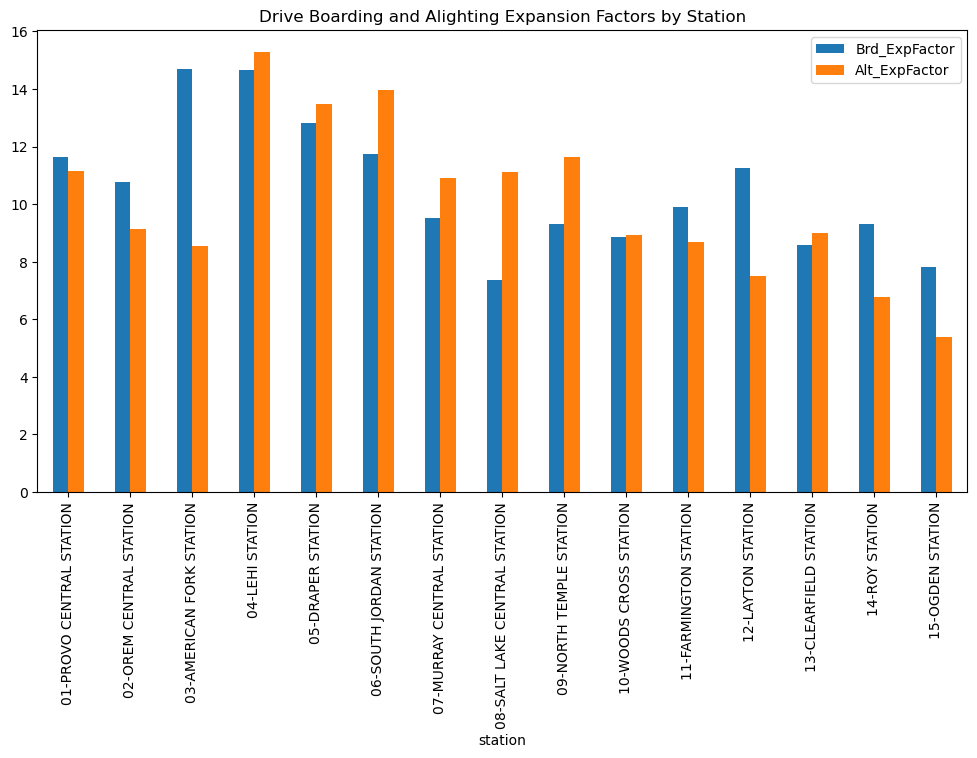

In [39]:
dfObsSum_Count

#dfObsSum_Count_g = (dfObsSum_Count.groupby(['station'])
#                   .agg(
#                       Brd_PA_g=('Brd_PA', 'sum'),
#                       Alt_PA_g=('Alt_PA', 'sum'),
#                       Brd_Count_g=('Brd_Count', 'sum'),
#                       Alt_Count_g=('Alt_Count', 'sum')
#                   )).reset_index()

dfObsSum_Count_g = dfObsSum_Count[dfObsSum_Count['AccessMode'] == 'drive']


dfObsSum_Count_g['Brd_ExpFactor'] = dfObsSum_Count_g['Brd_PA'] / dfObsSum_Count_g['Brd_Count']
dfObsSum_Count_g['Alt_ExpFactor'] = dfObsSum_Count_g['Alt_PA'] / dfObsSum_Count_g['Alt_Count']

dfObsSum_Count_g = dfObsSum_Count_g[['station','Brd_ExpFactor','Alt_ExpFactor']]
display(dfObsSum_Count_g)

dfObsSum_Count_g.set_index('station')[['Brd_ExpFactor', 'Alt_ExpFactor']].plot(
    kind='bar',
    figsize=(12, 6),
    title='Drive Boarding and Alighting Expansion Factors by Station'
)
plt.xlabel('Station')
plt.ylabel('Expansion Factor')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Comparison of TDM and OBS

In [17]:
df_final_pa = pd.concat([dfObsSum,df_ridsum_pa],ignore_index=True)
df_final_pa.to_csv("_data/base_observed_summary_pa.csv")

In [19]:
def calculate_percent_difference(observed, ttdm):
    return ((observed - ttdm) / ttdm) * 100

def plotit(variable, access_mode, view_option):
    output.clear_output()  # Clear previous output before displaying new content
    global firstTime
    if firstTime:
    
        # Filter or aggregate data based on access_mode
        if access_mode == 'All':
            filtered_data = df_final_pa
        else:
            filtered_data = df_final_pa[df_final_pa['AccessMode'] == access_mode]
        
        # Pivot the data to have separate columns for OBS and TDM
        pivot_data = filtered_data.pivot_table(
            index=['station'], 
            columns='Source', 
            values=variable, 
            aggfunc='sum'
        ).reset_index()
    
        # Ensure proper column names for easier reference
        pivot_data.columns = ['station', 'OBS', 'TDM']  # Adjust according to the 'Source' values (OBS and TDM)
    
        # Calculate the percent difference
        pivot_data['Percent_Difference'] = calculate_percent_difference(pivot_data['OBS'], pivot_data['TDM'])
    
        # Display either the graph or the table based on view_option
        if view_option == 'Graph':
            # Create histogram
            fig = px.histogram(
                filtered_data, 
                x="station", 
                y=variable, 
                text_auto='.2s',
                color='Source', 
                barmode='group',
                height=400
            )
            fig.update_layout(
                xaxis_title="Station Name",
                yaxis_title=str(variable),
                legend_title="Model Version"
            )
            
            # Display the plot
            fig.show()
    
        elif view_option == 'Table':
            # Display the table below the graph
            table_fig = go.Figure(go.Table(
                header=dict(values=["Station", "Observed", "TDM", "Percent Difference"]),
                cells=dict(values=[pivot_data['station'], pivot_data['OBS'], pivot_data['TDM'], pivot_data['Percent_Difference']])
            ))
        
        # Display the table
        table_fig.show()
    
    else:
        firstTime = True

In [ ]:
lstValues = list(['Brd_PA','Brd_Direct_PA','Brd_Transfer_PA','Alt_PA','Alt_Direct_PA','ALt_Transfer_PA'])
accessModeOptions = ['drive', 'walk', 'All']
viewOptions = ['Graph', 'Table']

selectValues = widgets.Select(options=lstValues, value=('Brd_PA' ), description = 'Select Variable')
selectAccessMode = widgets.Dropdown(options=accessModeOptions, value='All', description='Access Mode')
selectViewOption = widgets.Dropdown(options=viewOptions, value='Graph', description='View')


# Set up a global variable to track whether the widgets have been changed
firstTime = False

# create output widget to display filtered DataFrame
output = widgets.Output()
hbox = widgets.HBox([selectValues, selectAccessMode, selectViewOption])

# create interactive widget
interactive_output = widgets.interactive_output(plotit, {'variable':selectValues, 'access_mode': selectAccessMode, 'view_option': selectViewOption})

display(hbox)
display(interactive_output)
display(output)

Output()

Output()

## OD DIRECTION

### TDM Summary

Convert the results from the PA table to OD format

In [103]:
# group by Purpose, AccessMode, and station, then calculate aggregated values
df_brdsum_od = (
    df_ridsum_summary
    .groupby(["Purpose", "AccessMode", "station"], as_index=False)
    .agg(
        BrdDy=("Brd_PA", "sum"),
        BrdDyDirect=("Brd_Direct_PA", "sum"),
        BrdDyTransfer=("Brd_Transfer_PA", "sum"),
        AltDy=("Alt_PA", "sum"),
        AltDyDirect=("Alt_Direct_PA", "sum"),
        AltDyTransfer=("Alt_Transfer_PA", "sum")
    )
)

# add calculated columns for OD metrics
df_brdsum_od["Brd_OD"] = (df_brdsum_od["BrdDy"] + df_brdsum_od["AltDy"]) / 2
df_brdsum_od["Brd_Direct_OD"] = (df_brdsum_od["BrdDyDirect"] + df_brdsum_od["AltDyDirect"]) / 2
df_brdsum_od["Brd_Transfer_OD"] = (df_brdsum_od["BrdDyTransfer"] + df_brdsum_od["AltDyTransfer"]) / 2

# drop intermediate columns that are no longer needed
df_brdsum_od = df_brdsum_od.drop(
    columns=["BrdDy", "AltDy", "BrdDyDirect", "AltDyDirect", "BrdDyTransfer", "AltDyTransfer"]
)

# add source
df_brdsum_od['Source'] = 'TDM'

# drop purpose
df_brdsum_od = df_brdsum_od[['Source','station','AccessMode','Brd_OD','Brd_Direct_OD','Brd_Transfer_OD']]

# Display the resulting DataFrame
display(df_brdsum_od.head(10))

,Source,station,AccessMode,Brd_OD,Brd_Direct_OD,Brd_Transfer_OD
0,TDM,01-PROVO CENTRAL STATION,drive,369.385,143.410,225.975
1,TDM,02-OREM CENTRAL STATION,drive,1369.605,604.290,765.315
2,TDM,03-AMERICAN FORK STATION,drive,763.340,760.490,2.850
3,TDM,04-LEHI STATION,drive,772.105,731.290,40.815
4,TDM,05-DRAPER STATION,drive,607.625,605.030,2.595
5,TDM,06-SOUTH JORDAN STATION,drive,731.335,709.175,22.160
6,TDM,07-MURRAY CENTRAL STATION,drive,1675.570,515.815,1159.755
7,TDM,08-SALT LAKE CENTRAL STATION,drive,1316.510,261.350,1055.160
8,TDM,09-NORTH TEMPLE STATION,drive,1650.635,714.680,935.955
9,TDM,10-WOODS CROSS STATION,drive,519.235,488.605,30.630


### OBS Summary

In [104]:
transportCode = pd.DataFrame([
    [1 , 'walk' ],
    [2 , 'walk' ],
    [3 , 'walk' ],
    [4 , 'walk' ],
    [5 , 'drive'],
    [6 , 'drive'],
    [7 , 'drive'],
    [8 , 'drive'],
    [9 , 'drive'],
    [10, 'drive'],
    [11, 'walk' ],
    [12, 'drive'],
    [13, 'drive'],
    [14, 'walk' ],
    [15, 'walk' ]
], columns=['transportCode','AccessMode'])

In [105]:
# select columns needed
df_obs_loc_1 = df_obs_data[['id','stop_on_lat','stop_on_long','stop_off_lat','stop_off_long','prev_transfers_code','next_transfers_code','final_origin_transport_code','final_destin_transport_code','unlinked_weight_adj']]

# merge on stations
df_obs_loc_2 = pd.merge(df_obs_loc_1, df_stations2,left_on=['stop_on_lat', 'stop_on_long'],  right_on=['Lat', 'Lon'], how='left')
df_obs_loc_2['station_on'] = df_obs_loc_2['station']
df_obs_loc_2 = df_obs_loc_2.drop(columns={'Lat','Lon','station','stop_on_lat','stop_on_long'})

# merge off stations
df_obs_loc_3 = pd.merge(df_obs_loc_2, df_stations2,left_on=['stop_off_lat', 'stop_off_long'],  right_on=['Lat', 'Lon'], how='left')
df_obs_loc_3['station_off'] = df_obs_loc_3['station']
df_obs_loc_3 = df_obs_loc_3.drop(columns={'Lat','Lon','station','stop_off_lat','stop_off_long'})

# get rid of non-station ids
df_obs_loc_4 = df_obs_loc_3[(df_obs_loc_3['station_on'].notna()) | (df_obs_loc_3['station_off'].notna())]

# determine access/egress mode
df_obs_loc_5 = pd.merge(df_obs_loc_4, transportCode, left_on=['final_destin_transport_code'], right_on=['transportCode'],how='left').rename(columns={'AccessMode':"EgressMode"})
df_obs_loc_6 = pd.merge(df_obs_loc_5, transportCode, left_on=['final_origin_transport_code'], right_on=['transportCode'],how='left')
df_obs_loc_6 = df_obs_loc_6.drop(columns={'transportCode_x','transportCode_y','final_origin_transport_code','final_destin_transport_code'})

# determine if direct or transfer
df_obs_loc_7  = df_obs_loc_6.copy()
df_obs_loc_7['Direct_Access'] = df_obs_loc_7['prev_transfers_code'].apply(lambda x: 'Y' if x == 0 else 'N')
df_obs_loc_7['Direct_Egress'] = df_obs_loc_7['next_transfers_code'].apply(lambda x: 'Y' if x == 0 else 'N')

df_obs_loc_7


,id,prev_transfers_code,next_transfers_code,unlinked_weight_adj,station_on,station_off,EgressMode,AccessMode,Direct_Access,Direct_Egress
0,430.0,1.0,1.0,4.720,09-NORTH TEMPLE STATION,15-OGDEN STATION,walk,walk,N,N
1,434.0,1.0,0.0,4.720,09-NORTH TEMPLE STATION,14-ROY STATION,drive,walk,N,Y
2,435.0,0.0,0.0,4.073,02-OREM CENTRAL STATION,11-FARMINGTON STATION,drive,drive,Y,Y
3,436.0,1.0,0.0,4.720,09-NORTH TEMPLE STATION,15-OGDEN STATION,drive,walk,N,Y
4,744.0,0.0,0.0,5.194,14-ROY STATION,03-AMERICAN FORK STATION,drive,drive,Y,Y
...,...,...,...,...,...,...,...,...,...,...
1942,22722.0,1.0,0.0,11.951,08-SALT LAKE CENTRAL STATION,15-OGDEN STATION,drive,walk,N,Y
1943,22737.0,1.0,0.0,17.630,08-SALT LAKE CENTRAL STATION,10-WOODS CROSS STATION,drive,walk,N,Y
1944,22738.0,1.0,0.0,11.951,08-SALT LAKE CENTRAL STATION,13-CLEARFIELD STATION,drive,walk,N,Y
1945,22744.0,0.0,0.0,11.238,09-NORTH TEMPLE STATION,14-ROY STATION,drive,drive,Y,Y


In [106]:
# focus on boardings
df_obs_brd_1 = df_obs_loc_7.copy()
df_obs_brd_1 = df_obs_brd_1[['unlinked_weight_adj','station_on','AccessMode','Direct_Access']]
df_obs_brd_1 = df_obs_brd_1.rename(columns={'station_on':'station','Direct_Access':'Direct'})

# Group by station and calculate the required sums
df_obs_brd_final = (
    df_obs_brd_1.groupby(['station','AccessMode'], as_index=False)
    .agg(
        Brd_OD=('unlinked_weight_adj', 'sum'),
        Brd_Direct_OD=('unlinked_weight_adj', lambda x: x[df_obs_brd_1['Direct'] == 'Y'].sum()),
        Brd_Transfer_OD=('unlinked_weight_adj', lambda x: x[df_obs_brd_1['Direct'] == 'N'].sum())
    )
)

# determine source
df_obs_brd_final['Source'] = 'OBS'
df_obs_brd_final.head(10)


,station,AccessMode,Brd_OD,Brd_Direct_OD,Brd_Transfer_OD,Source
0,01-PROVO CENTRAL STATION,drive,1510.546,1510.546,0.000,OBS
1,01-PROVO CENTRAL STATION,walk,1335.111,319.299,1015.812,OBS
2,02-OREM CENTRAL STATION,drive,900.853,864.088,36.765,OBS
3,02-OREM CENTRAL STATION,walk,938.957,233.686,705.271,OBS
4,03-AMERICAN FORK STATION,drive,772.848,772.848,0.000,OBS
5,03-AMERICAN FORK STATION,walk,14.514,0.000,14.514,OBS
6,04-LEHI STATION,drive,821.488,821.488,0.000,OBS
7,04-LEHI STATION,walk,617.316,369.282,248.034,OBS
8,05-DRAPER STATION,drive,597.636,597.636,0.000,OBS
9,05-DRAPER STATION,walk,442.991,404.884,38.107,OBS


### Comparison of TDM and OBS

In [110]:
sumStats = pd.concat([df_brdsum_od, df_obs_brd_final]).reset_index()
sumStats = sumStats.round(3).fillna(0)
sumStats = sumStats.drop(columns='index')
sumStats

,Source,station,AccessMode,Brd_OD,Brd_Direct_OD,Brd_Transfer_OD
0,TDM,01-PROVO CENTRAL STATION,drive,369.385,143.410,225.975
1,TDM,02-OREM CENTRAL STATION,drive,1369.605,604.290,765.315
2,TDM,03-AMERICAN FORK STATION,drive,763.340,760.490,2.850
3,TDM,04-LEHI STATION,drive,772.105,731.290,40.815
4,TDM,05-DRAPER STATION,drive,607.625,605.030,2.595
5,TDM,06-SOUTH JORDAN STATION,drive,731.335,709.175,22.160
6,TDM,07-MURRAY CENTRAL STATION,drive,1675.570,515.815,1159.755
7,TDM,08-SALT LAKE CENTRAL STATION,drive,1316.510,261.350,1055.160
8,TDM,09-NORTH TEMPLE STATION,drive,1650.635,714.680,935.955
9,TDM,10-WOODS CROSS STATION,drive,519.235,488.605,30.630


In [255]:
#sumStats.to_csv("_data/base_observed_summary.csv", index=False)

In [108]:
import plotly.express as px
import plotly.graph_objects as go
import plotly as py
import ipywidgets as widgets

def calculate_percent_difference(observed, ttdm):
    return ((observed - ttdm) / ttdm) * 100

def plotit(variable, access_mode, view_option):
    output.clear_output()  # Clear previous output before displaying new content
    global firstTime
    if firstTime:
    
        # Filter or aggregate data based on access_mode
        if access_mode == 'All':
            filtered_data = sumStats
        else:
            filtered_data = sumStats[sumStats['AccessMode'] == access_mode]
        
        # Pivot the data to have separate columns for OBS and TDM
        pivot_data = filtered_data.pivot_table(
            index=['station'], 
            columns='Source', 
            values=variable, 
            aggfunc='sum'
        ).reset_index()
    
        # Ensure proper column names for easier reference
        pivot_data.columns = ['station', 'OBS', 'TDM']  # Adjust according to the 'Source' values (OBS and TDM)
    
        # Calculate the percent difference
        pivot_data['Percent_Difference'] = calculate_percent_difference(pivot_data['OBS'], pivot_data['TDM'])
    
        # Display either the graph or the table based on view_option
        if view_option == 'Graph':
            # Create histogram
            fig = px.histogram(
                filtered_data, 
                x="station", 
                y=variable, 
                text_auto='.2s',
                color='Source', 
                barmode='group',
                height=400
            )
            fig.update_layout(
                xaxis_title="Station Name",
                yaxis_title=str(variable),
                legend_title="Model Version"
            )
            
            # Display the plot
            fig.show()
    
        elif view_option == 'Table':
            # Display the table below the graph
            table_fig = go.Figure(go.Table(
                header=dict(values=["Station", "Observed", "TDM", "Percent Difference"]),
                cells=dict(values=[pivot_data['station'], pivot_data['OBS'], pivot_data['TDM'], pivot_data['Percent_Difference']])
            ))
        
        # Display the table
        table_fig.show()
    
    else:
        firstTime = True

In [109]:
from ipywidgets import Layout

lstValues = list(['Brd_OD','Brd_Direct_OD','Brd_Transfer_OD'])
accessModeOptions = ['drive', 'walk', 'All']
viewOptions = ['Graph', 'Table']

selectValues = widgets.Select(options=lstValues, value=('Brd_OD' ), description = 'Select Variable')
selectAccessMode = widgets.Dropdown(options=accessModeOptions, value='All', description='Access Mode')
selectViewOption = widgets.Dropdown(options=viewOptions, value='Graph', description='View')


# Set up a global variable to track whether the widgets have been changed
firstTime = False

# create output widget to display filtered DataFrame
output = widgets.Output()
hbox = widgets.HBox([selectValues, selectAccessMode, selectViewOption])

# create interactive widget
interactive_output = widgets.interactive_output(plotit, {'variable':selectValues, 'access_mode': selectAccessMode, 'view_option': selectViewOption})

display(hbox)
display(interactive_output)
display(output)

Output()

Output()

### Compare Drive Direct to PNR Space Limits

In [249]:
# filter to just direct drive
pnr_stats = sumStats[sumStats['AccessMode'] == 'drive']
pnr_stats = pnr_stats[['Source','station','Brd_Direct_OD']]

# prep pnr input
df_stations_rename = df_stations3.rename(columns={'PNR_Spaces':'Brd_Direct_OD'})
df_stations_rename['Source'] = 'PNR_Spaces'

# concat dfs
pnr_stats = pd.concat([pnr_stats, df_stations_rename]).reset_index()

# Create a grouped bar chart
fig = px.bar(
    pnr_stats,
    x="station",
    y="Brd_Direct_OD",
    color="Source",
    barmode="group",
    title="Station Metrics Comparison: TDM vs OBS vs PNR Spaces",
    labels={"Brd_Direct_OD": "Value", "station": "Station", "Source": "Data Source"},
    height=600
)

# Customize the layout
fig.update_layout(
    xaxis_title="Station",
    yaxis_title="Value",
    legend_title="Source",
    xaxis={'categoryorder': 'array', 'categoryarray': sorted(pnr_stats["station"].unique())},
    showlegend=True
)

# Show the plot
fig.show()

## Conclusions

 - As it was in the model a few versions ago, boardings at Provo Station are significantly lower than observed. Boardings at Ogden station, Salt Lake Central station, and Orem station are also of note. Higher boardings than observed is shown at North Temple.
 - the OD direction looks a little funky, so lets use PA direction for future comparisons